In [124]:
import pandas as pd
import numpy as np

In [134]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

In [135]:
full_model_selection = pd.read_excel("All_methods.xlsx")
full_model_selection.tail()

,ID,name,2015,2017,Ridge,Lasso,MSE,binary_cross_entropy,Lambda,Log_transformation,Normalization,Features,Number of layers,Learning rate,High_low seperator,Neural network,Activation fuction
17,18,Lasso2015_year_log,1,0,0,1,0.002626,0.0,0.014553,1,0,"cladediv0.1, cladediv0.8, claderich0.45, clade...",NaN,NaN,NaN,0,NaN
18,19,Lasso2017_year_log,0,1,0,1,0.153426,0.0,0.082985,1,0,claderich0.1,NaN,NaN,NaN,0,NaN
19,20,Lasso2015+2017_year_log,1,1,0,1,0.081905,0.0,0.038660,1,0,"Experiment, cladediv0.7",NaN,NaN,NaN,0,NaN
20,21,Linear regression_year_log,1,1,0,0,0.111601,0.0,NaN,1,0,"cladediv0.1, cladediv0.8, claderich0.45, clade...",NaN,NaN,NaN,0,NaN
21,22,Lasso2015+2017_year-selected_log,1,1,0,1,0.081832,0.0,0.035225,1,0,"cladediv0.1, cladediv0.8, claderich0.45, clade...",NaN,NaN,NaN,0,NaN


In [136]:
feature_one_hot = full_model_selection['Features'].str.get_dummies(sep=',')
act_one_hot = full_model_selection['Activation fuction'].str.get_dummies()
temp = full_model_selection.drop(['Features','Activation fuction'], axis=1)
feature_one_hot.head()

,claderich0.2,Experiment,cladediv0.1,cladediv0.15,cladediv0.2,cladediv0.25,cladediv0.3,cladediv0.35,cladediv0.4,cladediv0.45,...,claderich0.6,claderich0.7,claderich0.8,yields_average,Experiment,cladediv0.1,cladediv0.1,claderich0.1,claderich0.2,claderich0.7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [137]:
full_model_selection = pd.concat([temp,act_one_hot], axis=1)
full_model_selection.head()

,ID,name,2015,2017,Ridge,Lasso,MSE,binary_cross_entropy,Lambda,Log_transformation,Normalization,Number of layers,Learning rate,High_low seperator,Neural network,Sigmoid
0,1,Lasso2015,1,0,0,1,0.006687,0.0,0.050250,0,1,NaN,NaN,NaN,0,0
1,2,Lasso2017,0,1,0,1,0.015465,0.0,0.022983,0,1,NaN,NaN,NaN,0,0
2,3,Lasso2015+2017,1,1,0,1,0.033845,0.0,0.003024,0,1,NaN,NaN,NaN,0,0
3,4,Linear regression,1,1,0,0,0.030933,0.0,NaN,0,1,NaN,NaN,NaN,0,0
4,5,Lasso2015+2017-selected,1,1,0,1,0.034276,0.0,0.001898,0,1,NaN,NaN,NaN,0,0


In [140]:
tree = DecisionTreeRegressor(max_depth=4)
X_model = full_model_selection.drop(['MSE', 'binary_cross_entropy'], axis=1)
X_model_clean = X_model.drop(['ID', 'name','Lambda'], axis=1)
y_training = full_model_selection.MSE +  full_model_selection.binary_cross_entropy

X_model_clean = X_model_clean.fillna(-1)
X_model_clean.isnull().sum()

2015                  0
2017                  0
Ridge                 0
Lasso                 0
Log_transformation    0
Normalization         0
Number of layers      0
Learning rate         0
High_low seperator    0
Neural network        0
Sigmoid               0
dtype: int64

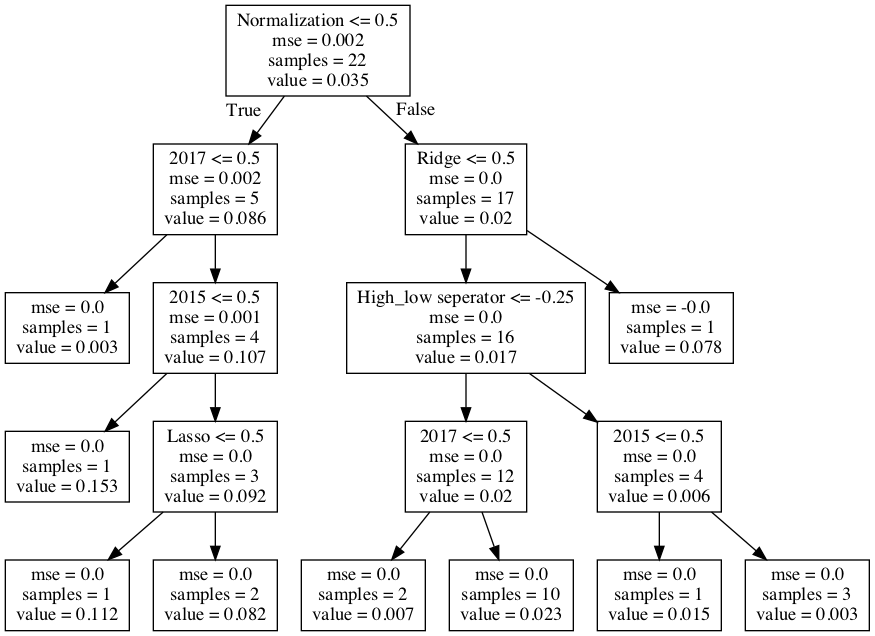

In [144]:
import random
#random.seed(0)
tree.fit(X_model_clean, y_training)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X_model_clean.columns, leaves_parallel=False, node_ids=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
